<a href="https://colab.research.google.com/github/nicomurci/Prueba_Desarrollador_DataCycle/blob/main/Punto_6_Python_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='blue'>**Punto 6 Python - Nombre Dataset: 'Airbnb Market Analysis & Real Estate Sales Data'**</font>

<font color='blue'>**Nicolás Adolfo Castillo Betancourt - nacastillo@bancodeoccidente.com.co**</font>

<font color='blue'>**https://www.kaggle.com/datasets/vrindakallu/new-york-dataset**</font>

In [2]:
# Importando dataset "new_york_listings_2024.csv"
import pandas as pd
df = pd.read_csv("sample_data/new_york_listings_2024.csv")
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1


In [3]:
# Verificando dimensiones del dataframe
print("Número de filas y columnas:", df.shape)

Número de filas y columnas: (20758, 22)


In [4]:
# Descripción general del DataFrame
print(df.describe())

                 id       host_id      latitude     longitude          price  \
count  2.075800e+04  2.075800e+04  20758.000000  20758.000000   20758.000000   
mean   3.034044e+17  1.749316e+08     40.726798    -73.939161     187.776616   
std    3.901216e+17  1.725541e+08      0.060294      0.061403    1022.797208   
min    2.595000e+03  1.678000e+03     40.500314    -74.249840      10.000000   
25%    2.708808e+07  2.041738e+07     40.684150    -73.980710      80.000000   
50%    4.993003e+07  1.087271e+08     40.722820    -73.949587     125.000000   
75%    7.216019e+17  3.144102e+08     40.763098    -73.917460     199.000000   
max    1.054376e+18  5.504035e+08     40.911147    -73.713650  100000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    20758.000000       20758.000000       20758.000000   
mean        28.558435          42.642596           1.257910   
std         33.536518          73.561654           1.904661   
min          1.000000      

In [5]:
# Validando los tipos de datos y los valores nulos en cada feature
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [6]:
# Validando cantidad de datos Nulos
datos_nulos = df.isnull().sum()
print(datos_nulos)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64


In [7]:
# Verificando si se tienen datos duplicados
duplicados = df[df.duplicated()]
cantidad_filas_duplicadas = duplicados.shape[0]
print("Cantidad de filas duplicadas:", cantidad_filas_duplicadas)
if cantidad_filas_duplicadas > 0:
    print("Filas duplicadas:")
    print(duplicados)
else:
    print("No hay filas duplicadas.")

Cantidad de filas duplicadas: 0
No hay filas duplicadas.


In [8]:
# Convirtiendo la columna "last_review" a tipo de dato de fecha
df['last_review'] = pd.to_datetime(df['last_review'])

In [9]:
# Validando los tipos de datos de "rating" con el fin de decidir el tipo de dato
valores_aleatorios_rating = df['rating'].sample(n=5)
# Mostrar los valores aleatorios
print("Valores aleatorios en la columna 'rating':")
print(valores_aleatorios_rating)

Valores aleatorios en la columna 'rating':
14560    No rating
12998        4.82 
11845    No rating
19053        4.76 
10466        4.68 
Name: rating, dtype: object


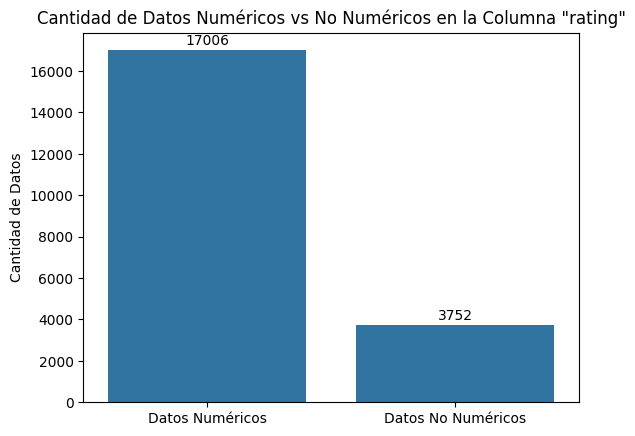

In [10]:
# Verificando la cantidad de datos no numericos "No rating"
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de datos numéricos y no numéricos en la columna "rating"
datos_numericos = df['rating'].apply(pd.to_numeric, errors='coerce')
cantidad_numericos = datos_numericos.count()
cantidad_no_numericos = len(df['rating']) - cantidad_numericos

# Crear un gráfico de barras
sns.barplot(x=['Datos Numéricos', 'Datos No Numéricos'], y=[cantidad_numericos, cantidad_no_numericos])

# Añadir etiquetas encima de las barras
for i, valor in enumerate([cantidad_numericos, cantidad_no_numericos]):
    plt.text(i, valor + 100, str(valor), ha='center', va='bottom')

plt.title('Cantidad de Datos Numéricos vs No Numéricos en la Columna "rating"')
plt.ylabel('Cantidad de Datos')
plt.show()



In [11]:
# Convirtiendo la columna "rating" a tipo de dato numérico y asignando NaN para los no numéricos "No rating"
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [12]:
# Convirtiendo la columna "baths" a tipo de dato numérico
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')

In [13]:
datos_nulos = df.isnull().sum()
print(datos_nulos)

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                              0
rating                            3752
bedrooms                             0
beds                                 0
baths                               13
dtype: int64


In [14]:
# Calcular el número total de datos en la columna "rating"
total_datos_rating = len(df['rating'])
# Contar la cantidad de valores nulos en la columna "rating"
datos_nulos_rating = df['rating'].isnull().sum()
# Calcular el porcentaje de valores nulos en la columna "rating"
porcentaje_nulos_rating = (datos_nulos_rating / total_datos_rating) * 100
print(f"Porcentaje de valores nulos en la columna 'rating': {porcentaje_nulos_rating:.2f}%")


Porcentaje de valores nulos en la columna 'rating': 18.07%


<font color='blue'>**Análisis Técnico**</font>

La decisión de eliminar la columna 'Rating' se fundamenta en la presencia de un porcentaje de valores nulos superior al 7%. En este contexto, la aplicación de técnicas de imputación se percibe como poco adecuada. La eliminación de dicha columna se considera una medida que contribuye a preservar la integridad y la coherencia de los datos.

In [15]:
# Eliminación de feature "rating"
df = df.drop(columns=['rating'])

In [16]:
# Calcular el número total de datos en la columna "baths"
total_datos_baths = len(df['baths'])
# Contar la cantidad de valores nulos en la columna "rating"
datos_nulos_baths = df['baths'].isnull().sum()
# Calcular el porcentaje de valores nulos en la columna "rating"
porcentaje_nulos_baths = (datos_nulos_baths / total_datos_baths) * 100
print(f"Porcentaje de valores nulos en la columna 'baths': {porcentaje_nulos_baths:.2f}%")


Porcentaje de valores nulos en la columna 'baths': 0.06%


Se realiza una imputación utilizando la media para completar los datos de la característica 'baths'. Esta elección se basa en la presencia de un porcentaje insignificante de datos faltantes en dicha característica.

In [17]:
# Convirtiendo "baths" a tipo de dato numérico y manejar "Not specified" como NaN
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')
# Calculando la media de la columna "baths"
media_baths = df['baths'].mean()
# Imputando los valores faltantes con la media
df['baths'] = df['baths'].fillna(media_baths)

In [18]:
# Verificando nuevamente cantidad de datos Nulos
datos_nulos = df.isnull().sum()
print(datos_nulos)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
bedrooms                          0
beds                              0
baths                             0
dtype: int64


In [19]:
# Validando los datos posterior a las modificaciones de features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20758 non-null  int64         
 1   name                            20758 non-null  object        
 2   host_id                         20758 non-null  int64         
 3   host_name                       20758 non-null  object        
 4   neighbourhood_group             20758 non-null  object        
 5   neighbourhood                   20758 non-null  object        
 6   latitude                        20758 non-null  float64       
 7   longitude                       20758 non-null  float64       
 8   room_type                       20758 non-null  object        
 9   price                           20758 non-null  float64       
 10  minimum_nights                  20758 non-null  int64         
 11  nu

<font color='blue'>**Proceso de creación de la columna AVG**</font>

In [20]:
# Asignando columnas a promediar
columna1 = df['price']
columna2 = df['availability_365']
df['AVG'] = (columna1 + columna2) / 2
print(df.head())

                   id                                               name  \
0             1312228         Rental unit in Brooklyn · ★5.0 · 1 bedroom   
1            45277537  Rental unit in New York · ★4.67 · 2 bedrooms ·...   
2  971353993633883038  Rental unit in New York · ★4.17 · 1 bedroom · ...   
3             3857863  Rental unit in New York · ★4.64 · 1 bedroom · ...   
4            40896611  Condo in New York · ★4.91 · Studio · 1 bed · 1...   

     host_id           host_name neighbourhood_group       neighbourhood  \
0    7130382              Walter            Brooklyn        Clinton Hill   
1   51501835            Jeniffer           Manhattan      Hell's Kitchen   
2  528871354              Joshua           Manhattan             Chelsea   
3   19902271  John And Catherine           Manhattan  Washington Heights   
4   61391963      Stay With Vibe           Manhattan         Murray Hill   

    latitude  longitude        room_type  price  ...  last_review  \
0  40.683710 -73.

<font color='blue'>**Conversión de DataFrame a Formato Parquet**</font>

In [21]:
# Conversión a formato parquet
df.to_parquet("sample_data/new_york.parquet", index=False)